In [1]:
!nvidia-smi

Sat Nov 21 03:48:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu


     |████████████████████████████████| 320.4MB 49kB/s 


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ComputerVision/train'
valid_path = '/content/drive/MyDrive/ComputerVision/val_set'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ComputerVision/train/*')

In [9]:

# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [11]:

# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ComputerVision/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7671 images belonging to 5 classes.


In [15]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ComputerVision/val_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1547 images belonging to 5 classes.


In [17]:
#@title 
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/35
114/240 [=============>................] - ETA: 56s - loss: 1.1064 - accuracy: 0.8706

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


240/240 [==============================] - 619s 3s/step - loss: 1.0790 - accuracy: 0.8746 - val_loss: 0.8219 - val_accuracy: 0.9101
Epoch 2/35
240/240 [==============================] - 116s 485ms/step - loss: 1.1733 - accuracy: 0.8855 - val_loss: 2.0278 - val_accuracy: 0.8494
Epoch 3/35
240/240 [==============================] - 119s 494ms/step - loss: 1.0107 - accuracy: 0.9069 - val_loss: 0.8993 - val_accuracy: 0.9302
Epoch 4/35
240/240 [==============================] - 119s 497ms/step - loss: 0.8861 - accuracy: 0.9194 - val_loss: 0.9934 - val_accuracy: 0.9153
Epoch 5/35
240/240 [==============================] - 120s 501ms/step - loss: 1.0068 - accuracy: 0.9157 - val_loss: 0.7202 - val_accuracy: 0.9418
Epoch 6/35
240/240 [==============================] - 121s 503ms/step - loss: 1.0346 - accuracy: 0.9227 - val_loss: 0.6995 - val_accuracy: 0.9418
Epoch 7/35
240/240 [==============================] - 121s 504ms/step - loss: 0.9304 - accuracy: 0.9304 - val_loss: 0.6621 - val_accuracy:

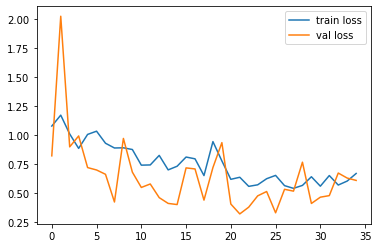

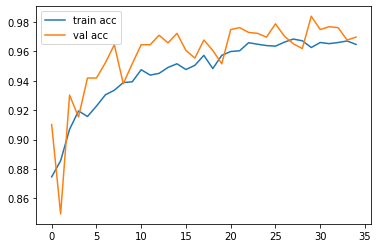

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:

y_pred

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.14323974e-21],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.78527240e-37,
        2.19867984e-15],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.03767696e-13, 0.00000000e+00, 0.00000000e+00,
        5.77067604e-36],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00]], dtype=float32)

In [22]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 0, 2, ..., 3, 0, 3])

In [31]:
pred_idg = ImageDataGenerator(preprocessing_function=preprocess_input)
pred_gen = pred_idg.flow_from_directory(
    '/content/drive/MyDrive/ComputerVision/test_set',
    target_size=(224,224),
    batch_size = 32,
    shuffle = False,
    
)
len(pred_gen.filenames)

Found 866 images belonging to 1 classes.


866

In [49]:
predicts = model.predict_generator(pred_gen, verbose = True, workers = 2)

28/28 [==============================] - 4s 127ms/step


In [50]:
predicts

array([[9.902158e-01, 3.637971e-29, 0.000000e+00, 9.784246e-03,
        0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00],
       [0.000000e+00, 2.483487e-31, 1.000000e+00, 0.000000e+00,
        0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00]], dtype=float32)

In [51]:
predicts = np.argmax(predicts, 
                     axis=1)

In [52]:
predicts

array([0, 3, 4, 3, 1, 2, 0, 1, 3, 2, 2, 2, 1, 1, 2, 4, 4, 3, 3, 2, 0, 0,
       4, 2, 3, 3, 3, 3, 0, 4, 4, 2, 1, 3, 4, 3, 3, 2, 3, 4, 4, 1, 4, 2,
       0, 0, 3, 4, 3, 3, 1, 4, 3, 2, 3, 3, 2, 2, 0, 3, 4, 1, 2, 4, 2, 4,
       1, 3, 4, 2, 3, 2, 2, 2, 3, 1, 1, 3, 0, 2, 4, 1, 2, 1, 3, 3, 1, 4,
       0, 0, 2, 4, 4, 4, 4, 4, 1, 4, 3, 4, 0, 1, 1, 4, 0, 4, 4, 2, 0, 1,
       1, 4, 4, 0, 3, 4, 2, 2, 4, 2, 2, 1, 4, 2, 1, 0, 3, 0, 1, 3, 3, 1,
       1, 1, 3, 4, 3, 1, 3, 0, 2, 4, 4, 4, 4, 3, 1, 1, 4, 0, 2, 4, 2, 0,
       0, 2, 1, 3, 4, 4, 3, 2, 3, 3, 1, 4, 2, 0, 1, 4, 2, 2, 3, 2, 2, 3,
       4, 2, 1, 3, 3, 4, 2, 2, 4, 3, 1, 2, 1, 3, 1, 3, 3, 0, 2, 3, 1, 2,
       4, 4, 1, 3, 1, 0, 4, 4, 2, 4, 4, 2, 1, 4, 1, 3, 0, 3, 2, 2, 2, 2,
       0, 3, 3, 3, 1, 2, 3, 2, 4, 3, 2, 4, 4, 3, 0, 3, 4, 4, 2, 1, 0, 0,
       3, 2, 3, 3, 4, 3, 4, 2, 3, 2, 1, 4, 0, 1, 3, 0, 4, 3, 2, 3, 3, 1,
       2, 4, 3, 2, 0, 1, 3, 2, 4, 4, 4, 3, 2, 2, 1, 3, 2, 4, 4, 1, 4, 3,
       2, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 2, 2, 3, 2,

In [42]:
import pandas as pd
import os

In [53]:


df = pd.DataFrame(columns=['file_name', 'category'])
df['file_name'] = [os.path.basename(x) for x in pred_gen.filenames]
df['category'] = predicts
df.to_csv("cvsub.csv", index=False)

In [54]:
from google.colab import files
files.download("cvsub.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>